<a href="https://colab.research.google.com/github/srimayamohapatra/Cyclone-in-Odisha-India-/blob/main/CycloneAnlysisSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import sqlite3
import os

# 1. Load the CSV file
# Make sure the filename matches what you uploaded
csv_file = 'Cyclone.csv'
df = pd.read_csv(csv_file)

# 2. Clean the data
# Remove empty "Unnamed" columns
df = df.dropna(how='all', axis=1)
# Fill missing dates
df['Date(DD-MM-YYYY)'] = df['Date(DD-MM-YYYY)'].ffill()

# 3. Rename columns for SQL
column_mapping = {
    'Serial Number of system during year': 'Serial_Number',
    'Basin of origin': 'Basin',
    'Name': 'Name',
    'Date(DD-MM-YYYY)': 'Date',
    'Time (UTC)': 'Time_UTC',
    'Latitude (lat.)': 'Latitude',
    'Longitude (lon.)': 'Longitude',
    'CI No [or "T. No"]': 'CI_No',
    'Estimated Central Pressure (hPa) [or "E.C.P"]': 'Estimated_Central_Pressure',
    'Maximum Sustained Surface Wind (km/hr) ': 'Max_Wind_Speed',
    'Pressure Drop (hPa)[or "delta P"]': 'Pressure_Drop',
    'Grade (text)': 'Grade'
}
df = df.rename(columns=column_mapping)

# 4. Create the SQLite Database
db_file = 'cyclone_data.db'
conn = sqlite3.connect(db_file)
df.to_sql('cyclones', conn, if_exists='replace', index=False)

# 5. Verify it works by running a quick SQL query
query = "SELECT Name, Max_Wind_Speed FROM cyclones LIMIT 5"
result = pd.read_sql(query, conn)
print("Success! Here is data from your new DB:")
print(result)

conn.close()

Success! Here is data from your new DB:
           Name  Max_Wind_Speed
0  cyclone. 04B           37.04
1  cyclone. 04B           37.04
2  cyclone. 04B           37.04
3  cyclone. 04B           37.04
4  cyclone. 04B           55.56


In [8]:
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('cyclone_data.db')

# SQL Query: Group by Name and find the max wind speed
query = """
SELECT Name, MAX(Max_Wind_Speed) as Top_Speed_kmph
FROM cyclones
GROUP BY Name
ORDER BY Top_Speed_kmph DESC;
"""

# Run query and display results
df_strongest = pd.read_sql(query, conn)
print(df_strongest)

conn.close()

            Name  Top_Speed_kmph
0   SuperCyclone          259.30
1         AMPHAN          240.76
2        PHAILIN          212.98
3           Fani          212.98
4         HUDHUD          185.20
5   cyclone. 04B          166.68
6           YAAS          138.90
7         BULBUL          138.90
8           DANA          111.12
9          ASANI          101.86
10         GULAB           83.34
11        HIBARU           64.82


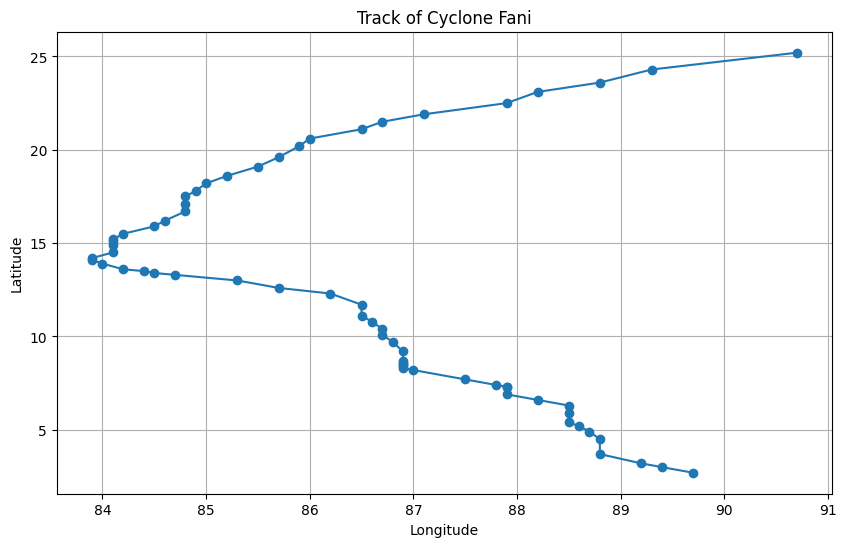

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

conn = sqlite3.connect('cyclone_data.db')

# Select data for one specific cyclone
cyclone_name = 'Fani'
query = f"SELECT Latitude, Longitude, Max_Wind_Speed FROM cyclones WHERE Name = '{cyclone_name}'"
df_track = pd.read_sql(query, conn)

conn.close()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_track['Longitude'], df_track['Latitude'], marker='o', linestyle='-')

# Add labels
plt.title(f'Track of Cyclone {cyclone_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

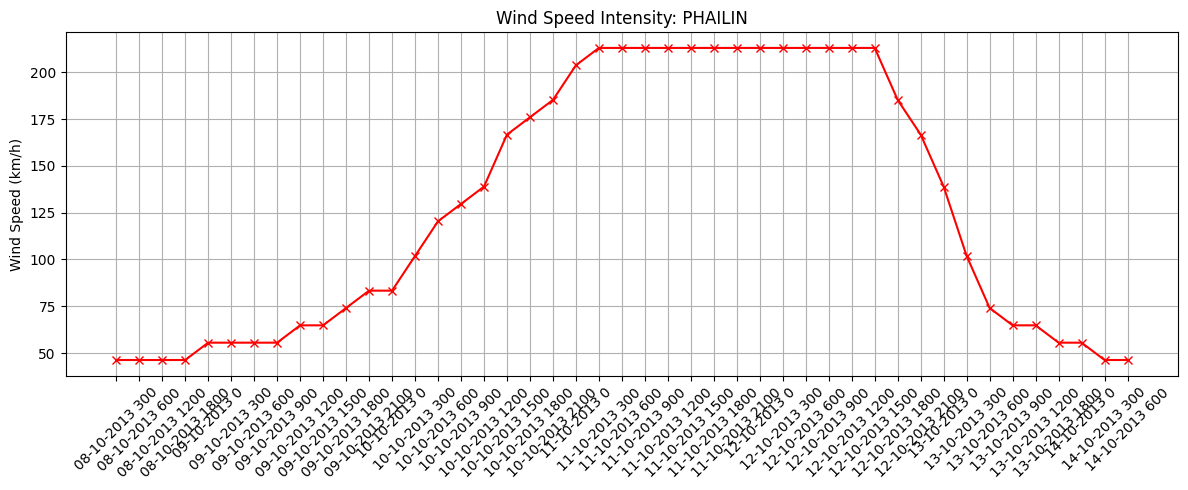

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

conn = sqlite3.connect('cyclone_data.db')

# Get wind speed data for 'PHAILIN' (or change to 'HUDHUD', 'AMPHAN', etc.)
cyclone_name = 'PHAILIN'
query = f"SELECT Date, Time_UTC, Max_Wind_Speed FROM cyclones WHERE Name = '{cyclone_name}'"
df_wind = pd.read_sql(query, conn)

conn.close()

# Create a label for the x-axis (Date + Time)
df_wind['Timestamp'] = df_wind['Date'] + ' ' + df_wind['Time_UTC'].astype(str)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_wind['Timestamp'], df_wind['Max_Wind_Speed'], color='red', marker='x')
plt.title(f'Wind Speed Intensity: {cyclone_name}')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

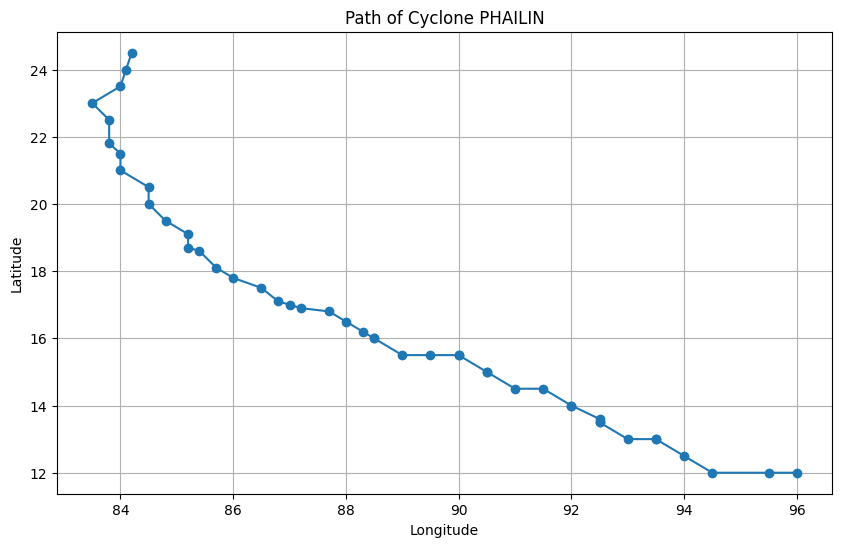

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to DB
conn = sqlite3.connect('cyclone_data.db')

# Choose a cyclone
cyclone_name = 'PHAILIN'

# Get location data
query = f"""
SELECT Longitude, Latitude
FROM cyclones
WHERE Name = '{cyclone_name}'
"""
df_track = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_track['Longitude'], df_track['Latitude'], marker='o', linestyle='-')
plt.title(f'Path of Cyclone {cyclone_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

conn.close()

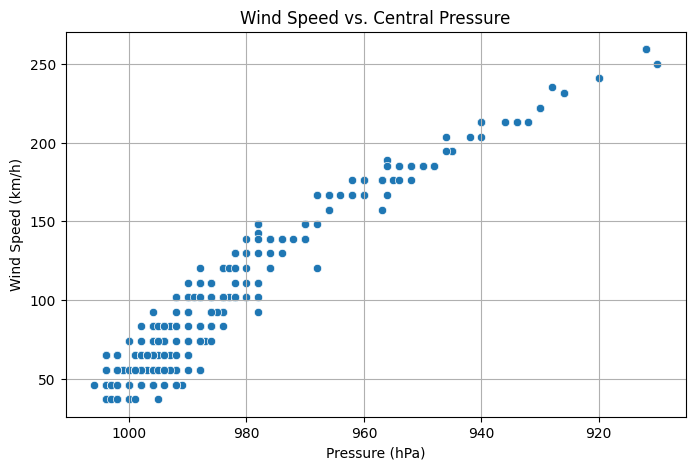

In [13]:
import seaborn as sns

conn = sqlite3.connect('cyclone_data.db')
df_all = pd.read_sql("SELECT Estimated_Central_Pressure, Max_Wind_Speed FROM cyclones", conn)
conn.close()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Estimated_Central_Pressure', y='Max_Wind_Speed', data=df_all)
plt.title('Wind Speed vs. Central Pressure')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Wind Speed (km/h)')
plt.gca().invert_xaxis() # Invert x-axis because lower pressure = stronger storm
plt.grid(True)
plt.show()

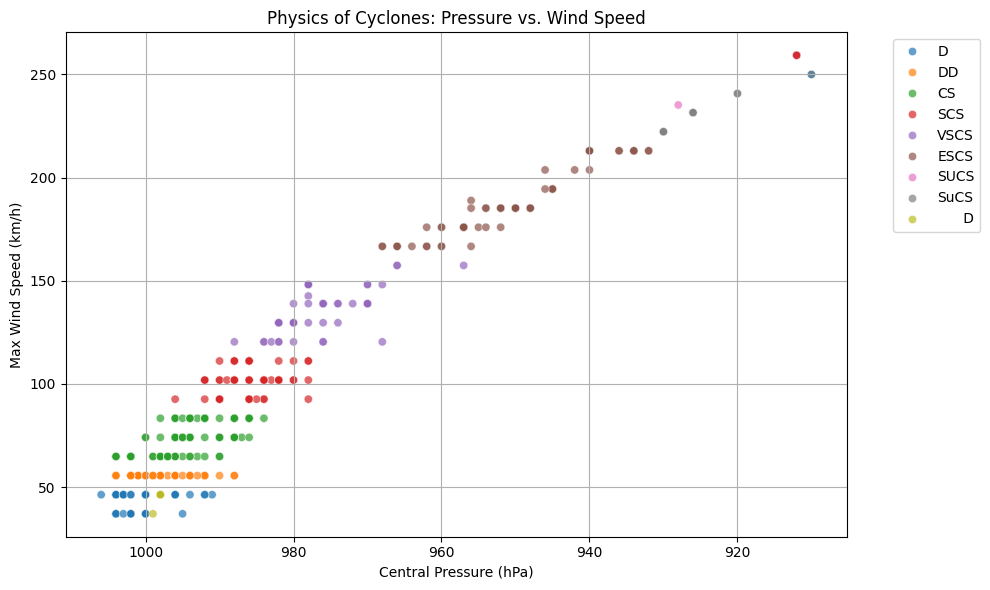

/tmp/ipython-input-2256363054.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grades, x='Grade', y='Count', palette='viridis')


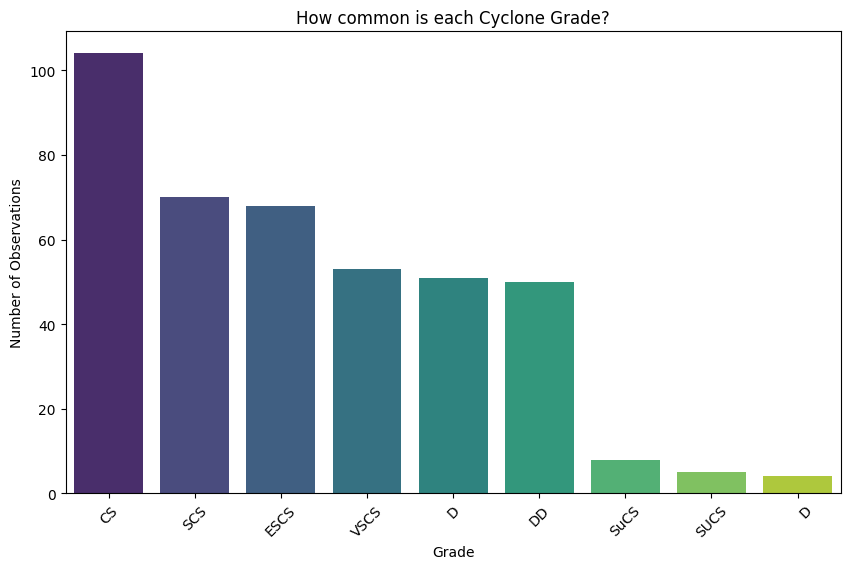

In [14]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to your database
conn = sqlite3.connect('cyclone_data.db')

# --- Plot 1: Pressure vs. Wind Speed ---
# Read data into a Pandas DataFrame
df = pd.read_sql("SELECT Estimated_Central_Pressure, Max_Wind_Speed, Grade FROM cyclones", conn)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Estimated_Central_Pressure', y='Max_Wind_Speed', hue='Grade', alpha=0.7)
plt.title('Physics of Cyclones: Pressure vs. Wind Speed')
plt.xlabel('Central Pressure (hPa)')
plt.ylabel('Max Wind Speed (km/h)')
plt.gca().invert_xaxis()  # Invert x-axis because lower pressure = stronger storm
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Plot 2: Frequency of Cyclone Grades ---
query_grades = """
SELECT Grade, COUNT(*) as Count
FROM cyclones
GROUP BY Grade
ORDER BY Count DESC
"""
df_grades = pd.read_sql(query_grades, conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_grades, x='Grade', y='Count', palette='viridis')
plt.title('How common is each Cyclone Grade?')
plt.xlabel('Grade')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

conn.close()

In [15]:
import sqlite3
import pandas as pd
import os

# --- PART 1: SETUP (Ensure Clean DB) ---
db_filename = 'cyclone_data.db'
if os.path.exists(db_filename):
    os.remove(db_filename)

# Load CSV, clean it, and save to SQLite
df = pd.read_csv('Cyclone.csv')
df = df.dropna(how='all', axis=1) # Remove empty columns
df['Date(DD-MM-YYYY)'] = df['Date(DD-MM-YYYY)'].ffill() # Fill missing dates

# Rename columns for SQL
column_mapping = {
    'Serial Number of system during year': 'Serial_Number',
    'Basin of origin': 'Basin',
    'Name': 'Name',
    'Date(DD-MM-YYYY)': 'Date',
    'Time (UTC)': 'Time_UTC',
    'Latitude (lat.)': 'Latitude',
    'Longitude (lon.)': 'Longitude',
    'CI No [or "T. No"]': 'CI_No',
    'Estimated Central Pressure (hPa) [or "E.C.P"]': 'Estimated_Central_Pressure',
    'Maximum Sustained Surface Wind (km/hr) ': 'Max_Wind_Speed',
    'Pressure Drop (hPa)[or "delta P"]': 'Pressure_Drop',
    'Grade (text)': 'Grade'
}
df = df.rename(columns=column_mapping)

conn = sqlite3.connect(db_filename)
df.to_sql('cyclones', conn, index=False)

# --- PART 2: INTERMEDIATE SQL QUERIES ---

# 1. GROUP BY & ORDER BY
# "Which cyclones have the most data points?"
print("--- 1. Most Data Points (Longest Lived?) ---")
query1 = """
SELECT Name, COUNT(*) as Readings_Count
FROM cyclones
GROUP BY Name
ORDER BY Readings_Count DESC
LIMIT 5;
"""
print(pd.read_sql(query1, conn))
print("\n")

# 2. DATE MANIPULATION (String Slicing)
# "How many distinct cyclones appeared each year?"
# Since Date is text (DD-MM-YYYY), we grab the last 4 characters for the Year.
print("--- 2. Activity Per Year ---")
query2 = """
SELECT substr(Date, 7, 4) as Year, COUNT(DISTINCT Name) as Cyclone_Count
FROM cyclones
GROUP BY Year
ORDER BY Year;
"""
print(pd.read_sql(query2, conn))
print("\n")

# 3. HAVING CLAUSE
# "Show me ONLY cyclones that reached 'Super Cyclonic' speeds (> 220 km/h)"
# WHERE filters rows; HAVING filters the result of a GROUP BY.
print("--- 3. Super Cyclones Only (> 220 km/h) ---")
query3 = """
SELECT Name, MAX(Max_Wind_Speed) as Top_Speed
FROM cyclones
GROUP BY Name
HAVING Top_Speed > 220
ORDER BY Top_Speed DESC;
"""
print(pd.read_sql(query3, conn))
print("\n")

# 4. CASE WHEN (Conditional Logic)
# "Categorize every reading as 'Severe' or 'Normal' based on wind speed"
print("--- 4. Custom Categories (CASE WHEN) ---")
query4 = """
SELECT Date, Name, Max_Wind_Speed,
  CASE
    WHEN Max_Wind_Speed >= 200 THEN 'Super Cyclonic'
    WHEN Max_Wind_Speed >= 120 THEN 'Severe'
    ELSE 'Normal'
  END as Intensity_Label
FROM cyclones
WHERE Max_Wind_Speed > 100
LIMIT 5;
"""
print(pd.read_sql(query4, conn))
print("\n")

conn.close()

--- 1. Most Data Points (Longest Lived?) ---
      Name  Readings_Count
0     Fani              64
1   HUDHUD              53
2  PHAILIN              45
3   AMPHAN              44
4   BULBUL              41


--- 2. Activity Per Year ---
   Year  Cyclone_Count
0  -202              1
1  1999              2
2  2005              1
3  2013              1
4  2014              1
5  2019              2
6  2020              1
7  2021              2
8  2022              1
9    24              1


--- 3. Super Cyclones Only (> 220 km/h) ---
           Name  Top_Speed
0  SuperCyclone     259.30
1        AMPHAN     240.76


--- 4. Custom Categories (CASE WHEN) ---
         Date          Name  Max_Wind_Speed Intensity_Label
0  16-10-1999  cyclone. 04B          101.86          Normal
1  16-10-1999  cyclone. 04B          101.86          Normal
2  16-10-1999  cyclone. 04B          101.86          Normal
3  17-10-1999  cyclone. 04B          120.38          Severe
4  17-10-1999  cyclone. 04B          14

In [18]:
import sqlite3
import pandas as pd

# Connect to your existing DB
conn = sqlite3.connect('cyclone_data.db')

# --- 1. WINDOW FUNCTIONS (LAG) ---
# Goal: Calculate "Intensification". Compare current wind speed to the previous reading (3 hours ago).
# LAG(Max_Wind_Speed) looks at the previous row's value.
print("--- 1. Rapid Intensification Analysis (Using LAG) ---")
query_lag = """
SELECT
    Name,
    Time_UTC,
    Max_Wind_Speed,
    LAG(Max_Wind_Speed) OVER (PARTITION BY Name ORDER BY Serial_Number) as Previous_Speed,
    (Max_Wind_Speed - LAG(Max_Wind_Speed) OVER (PARTITION BY Name ORDER BY Serial_Number)) as Speed_Increase
FROM cyclones
LIMIT 10;
"""
df_lag = pd.read_sql(query_lag, conn)
print(df_lag)
print("\n")

# --- 2. RANKING (RANK) ---
# Goal: Find the #1 strongest cyclone for EACH Year separately.
# We extract the Year first, then Rank wind speeds within that year.
print("--- 2. Top Cyclone Per Year (Using RANK) ---")
query_rank = """
WITH CycloneYears AS (
    SELECT
        Name,
        Max_Wind_Speed,
        substr(Date, 7, 4) as Year
    FROM cyclones
)
SELECT * FROM (
    SELECT
        Year,
        Name,
        Max_Wind_Speed,
        RANK() OVER (PARTITION BY Year ORDER BY Max_Wind_Speed DESC) as Rank_In_Year
    FROM CycloneYears
)
WHERE Rank_In_Year = 1
ORDER BY Year;
"""
df_rank = pd.read_sql(query_rank, conn)
print(df_rank)
print("\n")

# --- 3. UPDATING DATA (UPDATE) ---
# Goal: Let's pretend we found a typo. "cyclone. 04B" should be named "Odisha Cyclone".
# This changes the data permanently in the file.
print("--- 3. Modifying Data (UPDATE) ---")

# Step 1: Update the name
update_command = "UPDATE cyclones SET Name = 'Odisha Cyclone' WHERE Name = 'cyclone. 04B'"
conn.execute(update_command)
conn.commit() # Save changes

# Step 2: Verify the change
verify_query = "SELECT DISTINCT Name FROM cyclones WHERE Name = 'Odisha Cyclone'"
print(pd.read_sql(verify_query, conn))

conn.close()

--- 1. Rapid Intensification Analysis (Using LAG) ---
     Name  Time_UTC  Max_Wind_Speed  Previous_Speed  Speed_Increase
0  AMPHAN         0           46.30             NaN             NaN
1  AMPHAN       300           46.30           46.30            0.00
2  AMPHAN       600           46.30           46.30            0.00
3  AMPHAN       900           55.56           46.30            9.26
4  AMPHAN      1200           64.82           55.56            9.26
5  AMPHAN      1500           74.08           64.82            9.26
6  AMPHAN      1800           74.08           74.08            0.00
7  AMPHAN      2100           83.34           74.08            9.26
8  AMPHAN         0           83.34           83.34            0.00
9  AMPHAN       300           92.60           83.34            9.26


--- 2. Top Cyclone Per Year (Using RANK) ---
    Year          Name  Max_Wind_Speed  Rank_In_Year
0   -202         GULAB           83.34             1
1   -202         GULAB           83.34       

In [19]:
import sqlite3
import pandas as pd
import os

# --- PART 1: SETUP (Restore DB) ---
db_filename = 'cyclone_data.db'
conn = sqlite3.connect(db_filename)

# (Re-creating the flat table first to ensure we are on the same page)
df = pd.read_csv('Cyclone.csv')
df = df.dropna(how='all', axis=1)
df['Date(DD-MM-YYYY)'] = df['Date(DD-MM-YYYY)'].ffill()
df = df.rename(columns={'Serial Number of system during year': 'Serial_Number', 'Basin of origin': 'Basin', 'Name': 'Name', 'Date(DD-MM-YYYY)': 'Date', 'Time (UTC)': 'Time_UTC', 'Latitude (lat.)': 'Latitude', 'Longitude (lon.)': 'Longitude', 'Maximum Sustained Surface Wind (km/hr) ': 'Max_Wind_Speed'})
df.to_sql('cyclones_flat', conn, if_exists='replace', index=False)


# --- PART 2: THE "PROFESSIONAL" WAY (Normalization) ---

# 1. Create the Metadata Table (One row per Cyclone)
# We use DISTINCT to get each cyclone only once.
query_create_meta = """
CREATE TABLE IF NOT EXISTS cyclone_metadata AS
SELECT DISTINCT
    Serial_Number as Cyclone_ID,
    Name,
    Basin
FROM cyclones_flat;
"""
conn.execute(query_create_meta)

# 2. Create the Readings Table (Linked by ID)
# We strictly select the changing data, plus the ID to link back.
query_create_readings = """
CREATE TABLE IF NOT EXISTS cyclone_readings AS
SELECT
    Serial_Number as Cyclone_ID,
    Date,
    Time_UTC,
    Latitude,
    Longitude,
    Max_Wind_Speed
FROM cyclones_flat;
"""
conn.execute(query_create_readings)

print("Database normalized! We now have 2 linked tables instead of 1 flat file.\n")


# --- PART 3: THE JOIN (Bringing them back together) ---
# Goal: "Show me the Wind Speed (from Readings table) and Basin (from Metadata table)"
# We connect them using: ON readings.Cyclone_ID = metadata.Cyclone_ID

query_join = """
SELECT
    m.Name,
    m.Basin,
    r.Date,
    r.Max_Wind_Speed
FROM cyclone_readings r
JOIN cyclone_metadata m
    ON r.Cyclone_ID = m.Cyclone_ID
WHERE m.Name = 'Fani'
LIMIT 5;
"""

print("--- Result of JOIN Query ---")
print(pd.read_sql(query_join, conn))
print("\n")


# --- PART 4: BONUS - PYTHON FUNCTIONS IN SQL ---
# SQLite doesn't have a 'SQRT' function by default. But we can inject Python code into SQL!
# Let's calculate the "Distance from Equator" (which is just Latitude * 111 km).

import math

def calculate_distance_km(lat):
    # 1 degree of latitude is roughly 111 km
    return abs(lat) * 111

# Register the function so SQL can see it
conn.create_function("dist_from_equator", 1, calculate_distance_km)

query_python_sql = """
SELECT
    Name,
    Latitude,
    dist_from_equator(Latitude) as Km_From_Equator
FROM cyclones_flat
LIMIT 5;
"""

print("--- Result of Python Function inside SQL ---")
print(pd.read_sql(query_python_sql, conn))

conn.close()

Database normalized! We now have 2 linked tables instead of 1 flat file.

--- Result of JOIN Query ---
   Name Basin        Date  Max_Wind_Speed
0  Fani   BOB  01-05-2019          175.94
1  Fani   BOB  01-05-2019          175.94
2  Fani   BOB  01-05-2019          175.94
3  Fani   BOB  01-05-2019          175.94
4  Fani   BOB  01-05-2019          185.20


--- Result of Python Function inside SQL ---
           Name  Latitude  Km_From_Equator
0  cyclone. 04B      13.5           1498.5
1  cyclone. 04B      14.0           1554.0
2  cyclone. 04B      15.0           1665.0
3  cyclone. 04B      15.2           1687.2
4  cyclone. 04B      15.3           1698.3


Model Accuracy (R^2 Score): 0.95
The Formula: Wind_Speed = 2590.76 + (-2.53 * Pressure)
Interpretation: For every 1 hPa drop in pressure, wind speed increases by roughly 2.53 km/h.


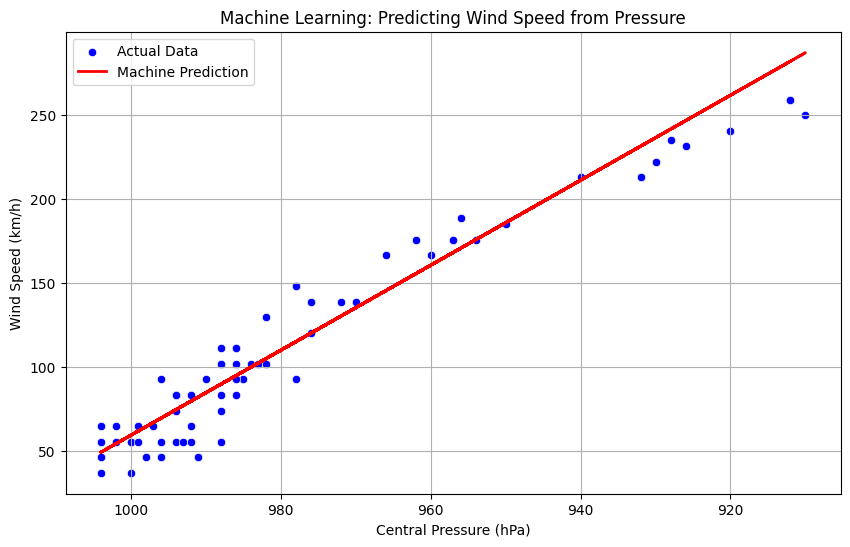

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. GET DATA
conn = sqlite3.connect('cyclone_data.db')
# We filter out rows where pressure might be missing or zero
df = pd.read_sql("SELECT Estimated_Central_Pressure, Max_Wind_Speed FROM cyclones WHERE Estimated_Central_Pressure > 800", conn)
conn.close()

# 2. PREPARE DATA
X = df[['Estimated_Central_Pressure']]  # Features (Input)
y = df['Max_Wind_Speed']                # Target (Output)

# Split: 80% of data to teach the model, 20% to test it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TRAIN MODEL
model = LinearRegression()
model.fit(X_train, y_train)

# 4. PREDICT & EVALUATE
predictions = model.predict(X_test)

# How good is it? (R^2 score close to 1 is perfect)
score = r2_score(y_test, predictions)
print(f"Model Accuracy (R^2 Score): {score:.2f}")
print(f"The Formula: Wind_Speed = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Pressure)")
print("Interpretation: For every 1 hPa drop in pressure, wind speed increases by roughly {:.2f} km/h.".format(abs(model.coef_[0])))

# 5. VISUALIZE THE "LEARNING"
plt.figure(figsize=(10, 6))
# Plot real data points
sns.scatterplot(x=X_test['Estimated_Central_Pressure'], y=y_test, color='blue', label='Actual Data')
# Plot the machine's prediction line
plt.plot(X_test, predictions, color='red', linewidth=2, label='Machine Prediction')

plt.title('Machine Learning: Predicting Wind Speed from Pressure')
plt.xlabel('Central Pressure (hPa)')
plt.ylabel('Wind Speed (km/h)')
plt.gca().invert_xaxis() # Lower pressure = Higher intensity
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import folium
import sqlite3
import pandas as pd

# 1. SETUP
conn = sqlite3.connect('cyclone_data.db')

# Cyclones to visualize
cyclones = ['Fani', 'AMPHAN', 'HUDHUD']
colors = ['red', 'blue', 'green']

# Center on India
m = folium.Map(location=[22.5, 82.0], zoom_start=5, tiles=None) # Set tiles to None initially

# 2. ADD GOOGLE MAPS LAYER
# This adds the standard Google Maps "Roadmap" view
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Maps',
    overlay=False,
    control=True
).add_to(m)

# 3. PLOT CYCLONES
for name, color in zip(cyclones, colors):
    query = f"SELECT Latitude, Longitude, Max_Wind_Speed, Date FROM cyclones WHERE Name = '{name}' ORDER BY Serial_Number"
    df_track = pd.read_sql(query, conn)

    # Path
    route_coords = list(zip(df_track['Latitude'], df_track['Longitude']))
    if route_coords:
        folium.PolyLine(
            route_coords,
            color=color,
            weight=3,
            opacity=0.8,
            tooltip=f"Track of {name}"
        ).add_to(m)

        # Landfall Marker
        end_point = route_coords[-1]
        final_speed = df_track.iloc[-1]['Max_Wind_Speed']
        folium.Marker(
            location=end_point,
            popup=f"<b>{name}</b><br>Speed: {final_speed} km/h",
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(m)

conn.close()

# 4. ADD LAYER CONTROL (To switch views if you add more)
folium.LayerControl().add_to(m)

# Display
m

In [24]:
import folium
from folium.plugins import HeatMap
import sqlite3
import pandas as pd

# 1. GET DATA
conn = sqlite3.connect('cyclone_data.db')
# We get every single coordinate recorded, weighted by wind speed
query = "SELECT Latitude, Longitude, Max_Wind_Speed FROM cyclones"
df_heat = pd.read_sql(query, conn)
conn.close()

# 2. CREATE MAP
m = folium.Map(location=[15, 88], zoom_start=5, tiles='OpenStreetMap')

# 3. ADD HEATMAP LAYER
# We convert the data into a list of [Lat, Lon, Weight]
heat_data = df_heat[['Latitude', 'Longitude', 'Max_Wind_Speed']].values.tolist()

# Add to map
HeatMap(
    heat_data,
    radius=15,    # Size of each point
    blur=10,      # Smoothness of the heat
    min_opacity=0.4
).add_to(m)

# Display
m

/tmp/ipython-input-1022429117.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total_Cyclones', data=df_season, palette='magma')


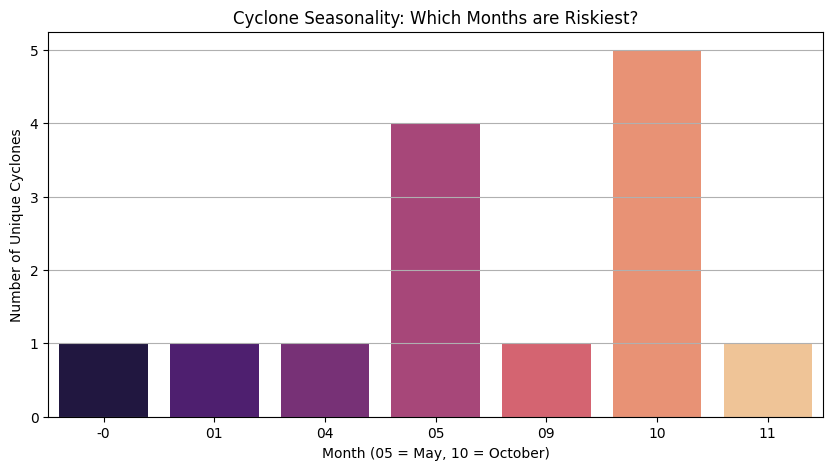

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas as pd

conn = sqlite3.connect('cyclone_data.db')

# SQL Query: Extract Month (MM) from 'DD-MM-YYYY' string
query = """
SELECT
    substr(Date, 4, 2) as Month,
    COUNT(DISTINCT Name) as Total_Cyclones
FROM cyclones
WHERE Month IS NOT NULL
GROUP BY Month
ORDER BY Month;
"""
df_season = pd.read_sql(query, conn)
conn.close()

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Total_Cyclones', data=df_season, palette='magma')
plt.title('Cyclone Seasonality: Which Months are Riskiest?')
plt.xlabel('Month (05 = May, 10 = October)')
plt.ylabel('Number of Unique Cyclones')
plt.grid(axis='y')
plt.show()

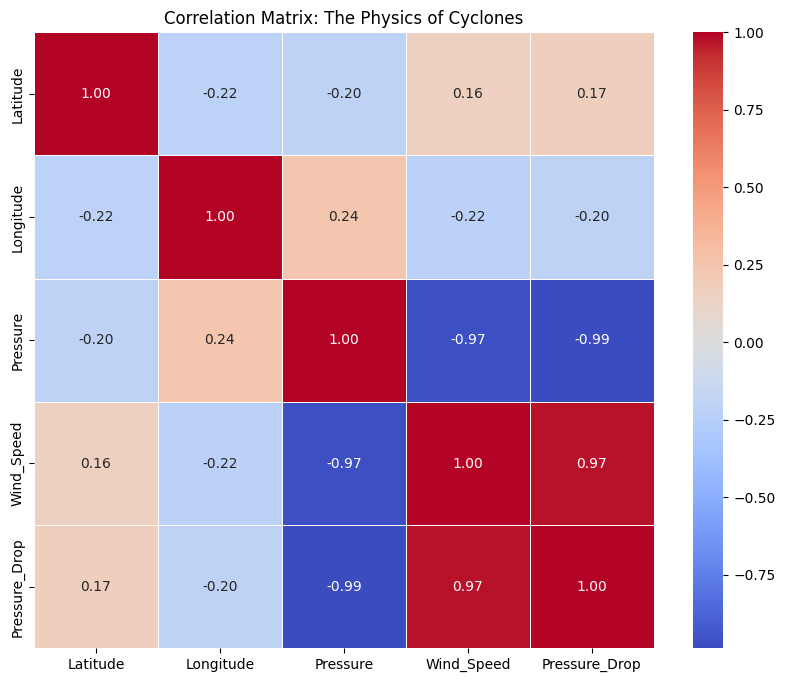

Generating Pairplot... (This might take a few seconds)


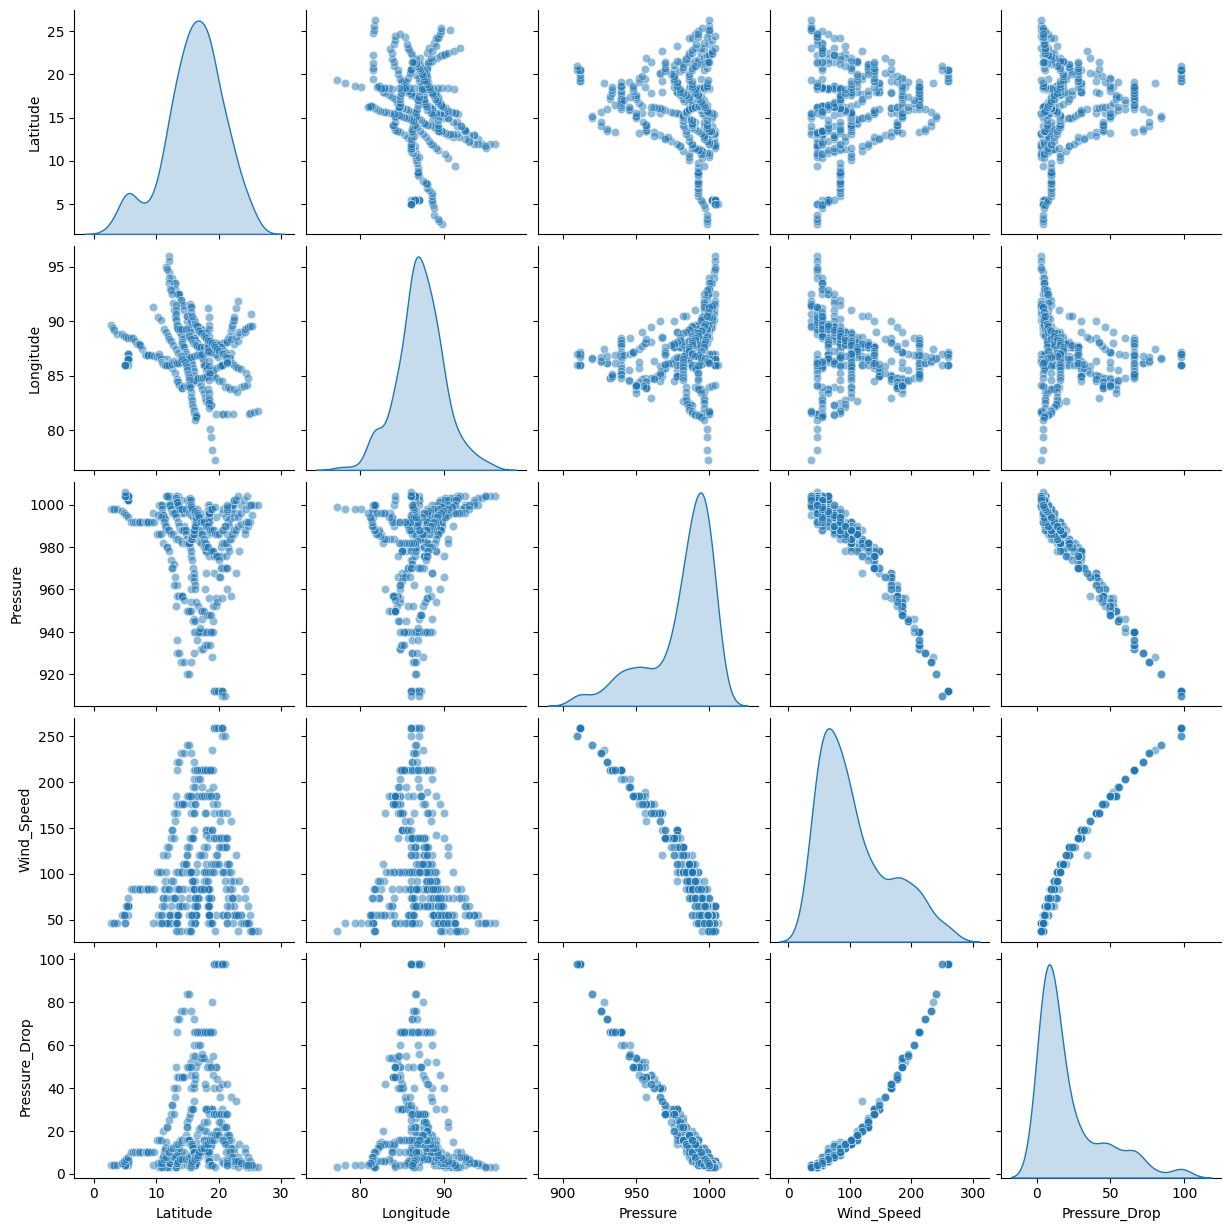

In [26]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. GET DATA
conn = sqlite3.connect('cyclone_data.db')
# We select numerical columns that might be related
query = """
SELECT
    Latitude,
    Longitude,
    Estimated_Central_Pressure as Pressure,
    Max_Wind_Speed as Wind_Speed,
    Pressure_Drop
FROM cyclones
WHERE Pressure > 900  -- Filter out bad data (pressure can't be 0)
"""
df_corr = pd.read_sql(query, conn)
conn.close()

# 2. COMPUTE CORRELATION
correlation_matrix = df_corr.corr()

# 3. VISUALIZE (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,     # Show the numbers
    cmap='coolwarm', # Blue for negative, Red for positive
    fmt=".2f",      # 2 decimal places
    linewidths=0.5
)
plt.title('Correlation Matrix: The Physics of Cyclones')
plt.show()

# 4. PAIRPLOT (The "Bird's Eye View")
# This plots every variable against every other variable
print("Generating Pairplot... (This might take a few seconds)")
sns.pairplot(df_corr, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

In [29]:
import sqlite3
import pandas as pd
import math

# 1. SETUP DATABASE CONNECTION
conn = sqlite3.connect('cyclone_data.db')

# 2. DEFINE THE MATH (Haversine Formula)
# This calculates the real-world distance between two points on Earth
def get_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# 3. INJECT THE FUNCTION INTO SQL
# We teach SQLite how to calculate "distance" using our Python function
conn.create_function("distance", 4, get_distance)

# 4. RUN THE SPATIAL QUERY
# Target: Chennai (Latitude: 13.08, Longitude: 80.27)
target_lat = 13.08
target_lon = 80.27
radius_km = 500

print(f"--- Cyclones passing within {radius_km}km of Chennai ---")

query = f"""
SELECT
    Name,
    Date,
    Max_Wind_Speed,
    CAST(distance(Latitude, Longitude, {target_lat}, {target_lon}) AS INTEGER) as Dist_From_Chennai_Km
FROM cyclones
WHERE Dist_From_Chennai_Km < {radius_km}
ORDER BY Dist_From_Chennai_Km ASC
LIMIT 10;
"""

df_danger = pd.read_sql(query, conn)
print(df_danger)

conn.close()

--- Cyclones passing within 500km of Chennai ---
    Name        Date  Max_Wind_Speed  Dist_From_Chennai_Km
0  ASANI  12-05-2022           46.30                   353
1  ASANI  11-05-2022           83.34                   365
2  ASANI  11-05-2022           74.08                   367
3  ASANI  10-05-2022           83.34                   369
4  ASANI  10-05-2022           92.60                   370
5  ASANI  11-05-2022           74.08                   371
6  ASANI  11-05-2022           55.56                   371
7  ASANI  11-05-2022           83.34                   373
8  ASANI  11-05-2022           55.56                   374
9  ASANI  11-05-2022           55.56                   378


In [30]:
import sqlite3
import pandas as pd
import math

# 1. SETUP DATABASE CONNECTION
conn = sqlite3.connect('cyclone_data.db')

# 2. DEFINE THE MATH (Haversine Formula)
# This calculates the real-world distance between two points on Earth
def get_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# 3. INJECT THE FUNCTION INTO SQL
# We teach SQLite how to calculate "distance" using our Python function
conn.create_function("distance", 4, get_distance)

# 4. RUN THE SPATIAL QUERY
# Target: Chennai (Latitude: 13.08, Longitude: 80.27)
target_lat = 13.08
target_lon = 80.27
radius_km = 500

print(f"--- Cyclones passing within {radius_km}km of Chennai ---")

query = f"""
SELECT
    Name,
    Date,
    Max_Wind_Speed,
    CAST(distance(Latitude, Longitude, {target_lat}, {target_lon}) AS INTEGER) as Dist_From_Chennai_Km
FROM cyclones
WHERE Dist_From_Chennai_Km < {radius_km}
ORDER BY Dist_From_Chennai_Km ASC
LIMIT 10;
"""

df_danger = pd.read_sql(query, conn)
print(df_danger)

conn.close()

--- Cyclones passing within 500km of Chennai ---
    Name        Date  Max_Wind_Speed  Dist_From_Chennai_Km
0  ASANI  12-05-2022           46.30                   353
1  ASANI  11-05-2022           83.34                   365
2  ASANI  11-05-2022           74.08                   367
3  ASANI  10-05-2022           83.34                   369
4  ASANI  10-05-2022           92.60                   370
5  ASANI  11-05-2022           74.08                   371
6  ASANI  11-05-2022           55.56                   371
7  ASANI  11-05-2022           83.34                   373
8  ASANI  11-05-2022           55.56                   374
9  ASANI  11-05-2022           55.56                   378


Model Accuracy: 92.77%


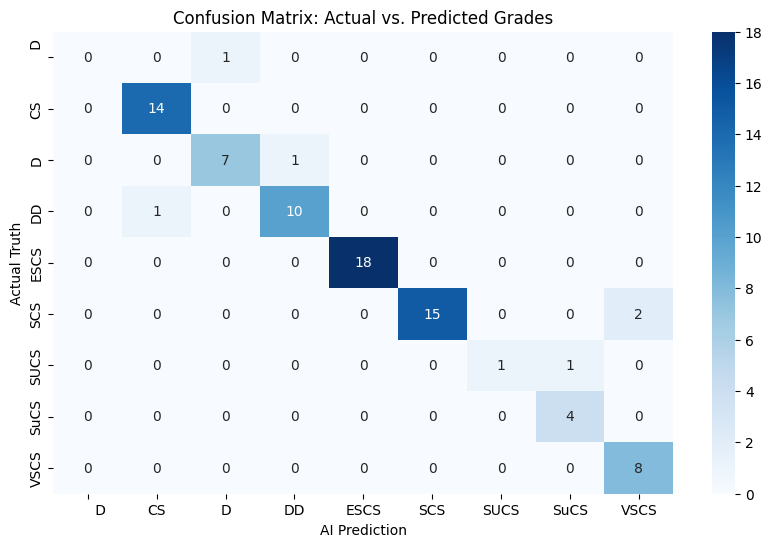

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. LOAD DATA
# We use the raw dataframe for simplicity here
df = pd.read_csv('Cyclone.csv')
# Rename columns for easier access
df = df.rename(columns={
    'Estimated Central Pressure (hPa) [or "E.C.P"]': 'Pressure',
    'Maximum Sustained Surface Wind (km/hr) ': 'Wind_Speed',
    'Grade (text)': 'Grade'
})
# Drop rows with missing values
df = df.dropna(subset=['Pressure', 'Wind_Speed', 'Grade'])

# 2. PREPARE DATA
X = df[['Pressure', 'Wind_Speed']]  # Features (What the AI sees)
y = df['Grade']                     # Target (What the AI must guess)

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TRAIN THE AI (Decision Tree)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 4. TEST THE AI
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy:.2%}")

# 5. VISUALIZE RESULTS (Confusion Matrix)
# This heatmap shows where the AI made mistakes
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix: Actual vs. Predicted Grades')
plt.xlabel('AI Prediction')
plt.ylabel('Actual Truth')
plt.show()

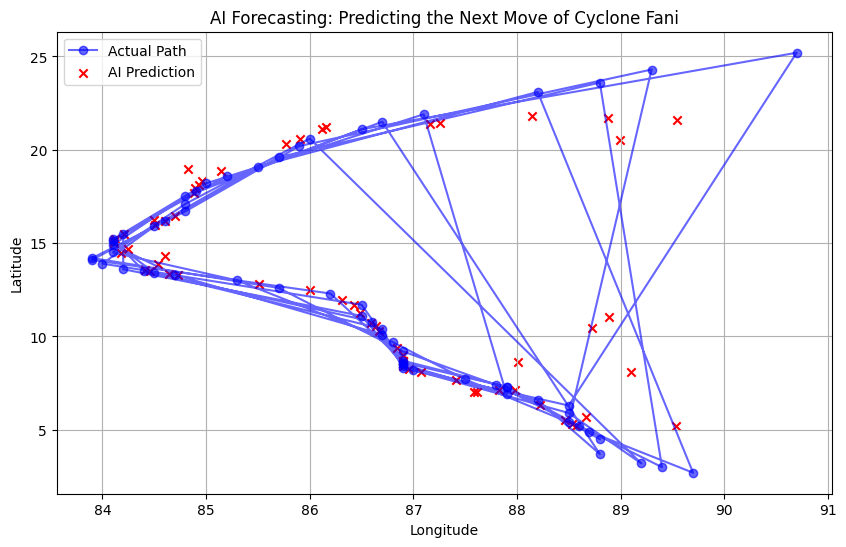

In [32]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. PREPARE DATA USING SQL
# We use the LEAD() window function to create our "Target" variables.
# Ideally, we want the model to learn: "If I am at (Lat, Lon), where is (Next_Lat, Next_Lon)?"
conn = sqlite3.connect('cyclone_data.db')
query = """
SELECT
    Name,
    Latitude,
    Longitude,
    Max_Wind_Speed,
    LEAD(Latitude) OVER (PARTITION BY Name ORDER BY Time_UTC) as Next_Lat,
    LEAD(Longitude) OVER (PARTITION BY Name ORDER BY Time_UTC) as Next_Lon
FROM cyclones
"""
df_ml = pd.read_sql(query, conn)
conn.close()

# Drop rows where there is no "Next" (e.g., the last point of a cyclone)
df_ml = df_ml.dropna()

# 2. TRAIN THE MODEL
# Features: Current Location + Wind
X = df_ml[['Latitude', 'Longitude', 'Max_Wind_Speed']]
# Target: Future Location
y = df_ml[['Next_Lat', 'Next_Lon']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. VISUALIZE THE PREDICTION (for 'Fani')
# We take the actual track of Fani and ask the AI: "Where did you think it would go?"
df_fani = df_ml[df_ml['Name'] == 'Fani']
X_fani = df_fani[['Latitude', 'Longitude', 'Max_Wind_Speed']]
predicted_path = model.predict(X_fani)

plt.figure(figsize=(10, 6))
# Actual Path (Blue Line)
plt.plot(df_fani['Longitude'], df_fani['Latitude'], 'b-o', label='Actual Path', alpha=0.6)
# Predicted Next Step (Red X)
plt.scatter(predicted_path[:, 1], predicted_path[:, 0], c='red', marker='x', label='AI Prediction')

plt.title('AI Forecasting: Predicting the Next Move of Cyclone Fani')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()